In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_style('whitegrid')

RAW_PATH = '../data/raw/'
PROCESSED_PATH = '../data/processed/'
os.makedirs(PROCESSED_PATH, exist_ok=True)

## 1. Load data

In [5]:
credit_path = os.path.join(RAW_PATH, 'creditcard.csv')
if not os.path.exists(credit_path):
    raise FileNotFoundError(f'Missing file: {credit_path}. Place creditcard.csv under data/raw/.')

credit_df = pd.read_csv(credit_path)
print('creditcard shape:', credit_df.shape)
credit_df.head()

creditcard shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 2. Clean data
- Missing values and duplicates
- Ensure Class is int

In [6]:
print('Missing values:')
print(credit_df.isnull().sum())

print('Duplicates:', credit_df.duplicated().sum())
credit_df = credit_df.drop_duplicates()

credit_df['Class'] = credit_df['Class'].astype(int)

print('After cleaning shape:', credit_df.shape)

Missing values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Duplicates: 1081
After cleaning shape: (283726, 31)


## 3. Class imbalance

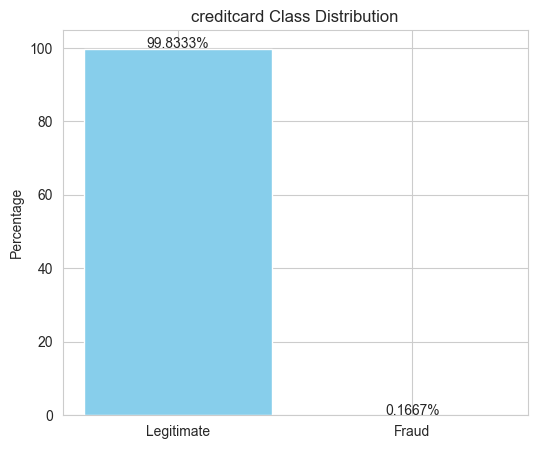

Fraud rate: 0.1667%


In [7]:
counts = credit_df['Class'].value_counts(normalize=True) * 100
plt.figure(figsize=(6, 5))
plt.bar(['Legitimate', 'Fraud'], counts.values, color=['skyblue', 'salmon'])
plt.title('creditcard Class Distribution')
plt.ylabel('Percentage')
for i, v in enumerate(counts.values):
    plt.text(i, v + 0.05, f'{v:.4f}%', ha='center')
plt.show()

print(f"Fraud rate: {credit_df['Class'].mean() * 100:.4f}%")

## 4. EDA highlights
- Amount distribution by class (log x for skew)
- Boxplot of Amount by class
- Top absolute correlations with Class

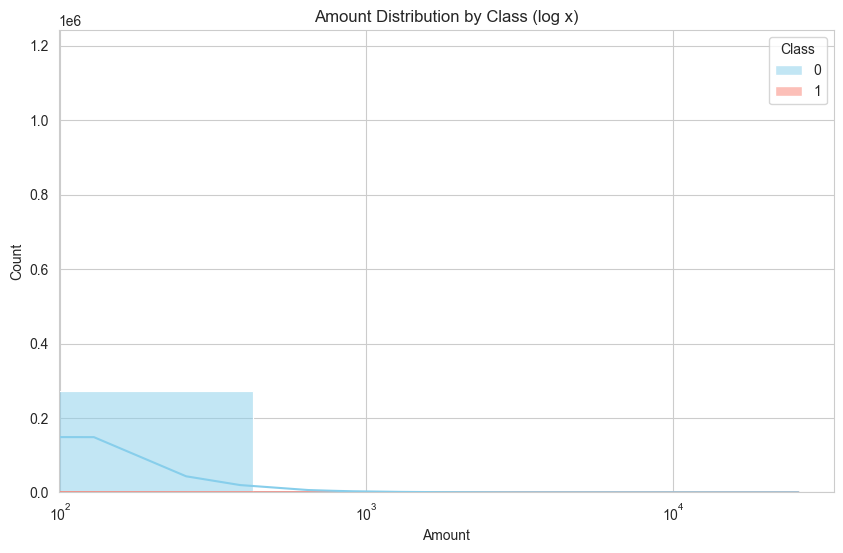

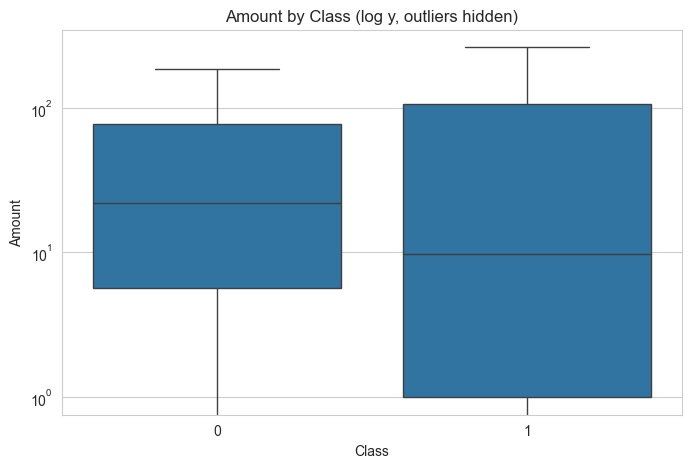

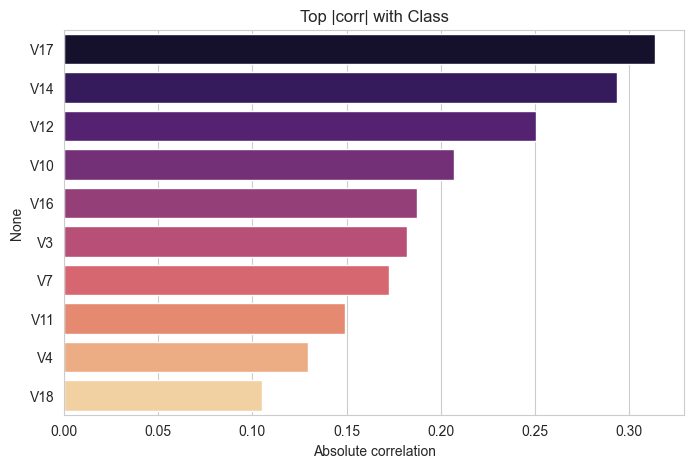

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data=credit_df, x='Amount', hue='Class', bins=60, kde=True, palette=['skyblue', 'salmon'])
plt.xscale('log')
plt.title('Amount Distribution by Class (log x)')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(data=credit_df, x='Class', y='Amount', showfliers=False)
plt.yscale('log')
plt.title('Amount by Class (log y, outliers hidden)')
plt.show()

corr = credit_df.corr(numeric_only=True)['Class'].abs().sort_values(ascending=False)
top_corr = corr.iloc[1:11]  # skip Class itself
plt.figure(figsize=(8, 5))
sns.barplot(x=top_corr.values, y=top_corr.index, palette='magma')
plt.title('Top |corr| with Class')
plt.xlabel('Absolute correlation')
plt.show()

## 5. Simple temporal features

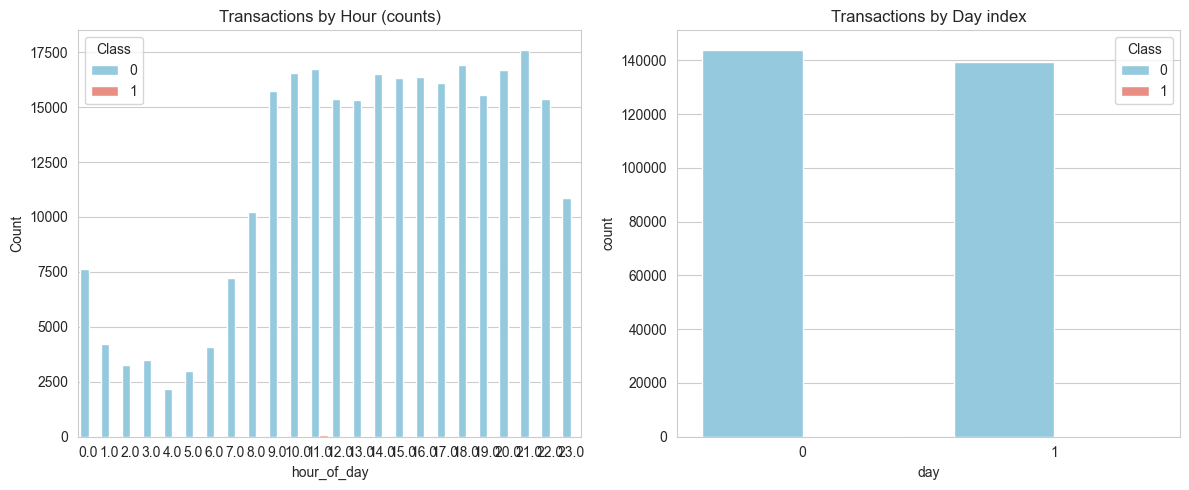

In [9]:
credit_df['hour_of_day'] = (credit_df['Time'] % 86400) // 3600
credit_df['day'] = (credit_df['Time'] // 86400).astype(int)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(data=credit_df, x='hour_of_day', hue='Class', ax=ax[0], palette=['skyblue', 'salmon'])
ax[0].set_title('Transactions by Hour (counts)')
ax[0].set_ylabel('Count')
sns.countplot(data=credit_df, x='day', hue='Class', ax=ax[1], palette=['skyblue', 'salmon'])
ax[1].set_title('Transactions by Day index')
plt.tight_layout()
plt.show()

## 6. Save processed data

In [10]:
credit_df.to_csv(PROCESSED_PATH + 'creditcard_processed.csv', index=False)
print('Saved to data/processed/creditcard_processed.csv')
print('Next: handle imbalance during modeling (e.g., class weights or SMOTE on train only).')

Saved to data/processed/creditcard_processed.csv
Next: handle imbalance during modeling (e.g., class weights or SMOTE on train only).
